## PROJECT :- PROPERTY INSURANCE FRAUD DETECTION 

## Problem Statement - The goal of this project is to build a model that can detect auto insurance fraud.


## Abstract - 
"Insurance fraud is a serious and growing problem, and there is widespread recognition that traditional approaches to tackling fraud are inadequate. Studies of insurance fraud have typically focused upon identifying characteristics of fraudulent claims and claimants, and this focus is apparent in the currentwave of forensic and data-mining technologies for fraud detection. An alternative approach is tounderstand and then optimize existing practices in the detection of fraud. We report an ethnographicstudy that explored the nature of motor insurance fraud-detection practices in two leading insurance companies. The results of the study suggest that an occupational focus on the practices of fraud detection can complement and enhance forensic and data-mining approaches to the detection of potentially fraudulent claims."

# Project Team Members and Task :-

## 1) Shraddha Ghadage - EDA  
## 2) Akanksha Patankar - Model Building
## 3) Keerthi Kumar - Model Building 
## 4) Wajid Sain - Model Building and Hyperparameter Tunning
## 5) Yash Gupta - Deployment
## 6) Priya Kamaraj


# Features Description 

In [1]:
# Name                            Label                                                    Values             

#claimid                        Claim ID                                                    None

#incident_date                  Date of incident                                            None

#claim_type                     Type of claim                                               1 - Wind/Hail
#                                                                                           2 - Water damage
#                                                                                           3 - Fire-Smoke
#                                                                                           4 - Contamination
#                                                                                           5 - Theft/Vandalism
                
#uninhabitable                 Property uninhabitable                                       0 - No
#                                                                                           1 - Yes

#claim_amount                  Cost of claim in thousands                                   None

#fraudulent                    Fraudulent claim                                             0 - No
#                                                                                           1 - Yes 
    
#policyid                      Policy ID                                                    None

#policy_date                   Date policy went into effect                                 None

#coverage                      Amount of coverage in thousands                              None

#deductible                    Deductible                                                   None

#townsize                      Size of hometown                                             1 - > 250,000
#                                                                                           2 - 50,000-249,999
#                                                                                         3 - 10,000-49,999
#                                                                                          4 - 2,500-9,999 
#                                                                                          5 - < 2,500
                
#gender                       Gender                                                        0 - Male
#                                                                                           1 - Female
    
#dob                          Date of birth                                                 None
 
#edcat                        Level of education                                            1 - Did not complete high school
#                                                                                           2 - High school degree
#                                                                                           3 - Some college
#                                                                                           4 - College degree
#                                                                                           5 - Post-undergraduate degree
                
#job_start_date              Employment starting date                                       None

#retire                      Retired                                                        0 - No
#                                                                                           1 - Yes
    
#income                      Household income in thousands                                  None

#marital                     Marital status                                                 0 - Unmarried
#                                                                                           1 - Married
    
#reside                      Number of people in household                                  None

#occupancy_date              Date of occupancy                                              None

#primary_residence           Property is primary residence                                  0 - Yes
#                                                                                           1 - No
                

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from pylab import rcParams
from sklearn.model_selection import cross_val_score
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv('Insurance_claims.csv')
df.head(10)

,claimid,incident_date,claim_type,uninhabitable,claim_amount,fraudulent,policyid,policy_date,coverage,deductible,townsize,gender,dob,edcat,job_start_date,retire,income,marital,reside,occupancy_date,primary_residence
0,351069569,01/18/2008,3,0,192.29,0,SSB-514465,01/26/1987,436,2000,1,1,12/3/1943,2,04/16/1981,0,193,0,1,6/1/1978,1
1,806984053,07/18/2008,3,0,355.90,0,XWZ-702801,05/14/1983,925,1000,2,0,10/5/1933,2,4/11/1982,0,203,0,1,4/2/1971,1
2,654100160,1/3/2008,5,0,3.53,0,FMP-391297,01/15/1988,79,1000,1,1,2/4/1939,2,08/20/2004,0,49,0,1,03/30/1977,1
3,653220231,10/28/2008,1,0,33.45,0,WEV-471919,02/22/2000,607,1000,1,0,12/4/1972,3,07/29/1999,0,118,1,3,05/23/1993,1
4,226637568,05/31/2008,5,0,4.03,0,ESY-256692,9/8/2001,119,3000,5,1,4/8/1968,1,4/7/2004,0,18,0,1,4/9/2000,1
5,46113373,03/22/2008,4,0,66.36,0,NJF-209320,06/16/1994,144,500,2,0,09/24/1930,3,06/19/1969,1,25,1,2,5/4/1993,1
6,397237121,9/8/2008,1,0,29.39,0,RBC-327042,08/25/2006,636,1000,4,0,11/18/1982,4,11/27/2008,0,36,0,1,2/9/2003,1
7,917836504,2/11/2008,2,0,28.99,0,NFD-705036,12/5/1995,254,2000,1,1,06/18/1944,1,07/24/1988,1,13,1,2,08/17/1986,1
8,277901331,10/28/2008,4,0,128.32,0,OTS-825151,3/12/1978,291,1000,2,0,11/13/1948,4,09/17/1997,0,91,0,1,07/15/1968,1
9,16290780,8/1/2008,5,0,4.84,0,EEA-886708,10/2/2006,114,1000,5,1,06/24/1981,1,11/4/2005,0,23,1,4,2/12/2000,1


In [4]:
df.tail(10)

,claimid,incident_date,claim_type,uninhabitable,claim_amount,fraudulent,policyid,policy_date,coverage,deductible,townsize,gender,dob,edcat,job_start_date,retire,income,marital,reside,occupancy_date,primary_residence
4405,251213288,08/17/2008,3,0,482.88,1,QMU-966490,04/14/1983,1133,2000,5,0,12/5/1950,3,04/21/1982,0,178,1,2,05/24/1974,0
4406,683413447,8/4/2008,2,0,32.07,0,PSI-813286,07/21/1991,253,1000,1,0,3/2/1966,2,09/28/1990,0,87,0,3,05/29/1988,1
4407,911924893,06/28/2008,3,0,181.18,1,IPO-174757,07/16/1977,478,3000,5,1,1/11/1936,4,04/27/1970,1,83,0,1,11/24/1965,1
4408,692815487,12/5/2008,5,0,15.39,0,BAM-996481,01/16/1982,298,1000,3,0,03/28/1944,4,8/6/1993,0,98,0,1,08/23/1975,1
4409,566242715,06/22/2008,5,0,7.37,1,XJC-934708,2/10/1979,152,1000,3,0,12/17/1944,3,5/12/1999,0,66,1,3,09/15/1973,1
4410,480679892,03/14/2008,4,0,44.79,0,AEG-804848,10/13/1981,95,1000,1,0,04/16/1945,3,9/6/2002,0,40,1,2,12/2/1976,1
4411,978293405,01/16/2008,3,1,175.00,0,VXA-739792,03/14/2002,175,1000,5,0,01/25/1961,3,06/13/2001,0,80,0,1,03/14/1996,1
4412,832521237,1/7/2008,4,0,170.79,0,ZIJ-989259,05/30/1990,475,1000,4,0,03/23/1942,3,08/29/1977,1,254,1,2,04/15/1984,0
4413,646426289,3/6/2008,3,0,137.79,0,QJD-843265,8/7/2007,327,1000,4,1,10/28/1978,3,02/22/2004,0,68,0,2,01/20/2003,1
4414,910897718,09/21/2008,5,0,4.22,0,YXM-949527,07/31/2000,87,1000,1,1,01/30/1936,1,12/11/1982,1,15,0,1,02/13/1994,1


# Data Description 

In [5]:
df.shape

(4415, 21)

In [6]:
df.dtypes

claimid                int64
incident_date         object
claim_type             int64
uninhabitable          int64
claim_amount         float64
fraudulent             int64
policyid              object
policy_date           object
coverage               int64
deductible             int64
townsize               int64
gender                 int64
dob                   object
edcat                  int64
job_start_date        object
retire                 int64
income                 int64
marital                int64
reside                 int64
occupancy_date        object
primary_residence      int64
dtype: object

# Data preprocessing 

In [7]:
# Statistical Summary
from pandas import set_option
set_option('precision', 3)

description = df.describe()
print(description)

         claimid  claim_type  uninhabitable  claim_amount  fraudulent  \
count  4.415e+03    4415.000       4415.000      4415.000    4415.000   
mean   4.988e+08       3.057          0.146        73.011       0.105   
std    2.894e+08       1.535          0.353       144.401       0.306   
min    2.548e+05       1.000          0.000         1.460       0.000   
25%    2.428e+08       2.000          0.000         8.425       0.000   
50%    5.026e+08       3.000          0.000        22.890       0.000   
75%    7.438e+08       5.000          0.000        70.000       0.000   
max    9.999e+08       5.000          1.000      1662.000       1.000   

       coverage  deductible  townsize    gender     edcat    retire    income  \
count  4415.000    4415.000  4415.000  4415.000  4415.000  4415.000  4415.000   
mean    305.039    1669.875     2.676     0.507     2.696     0.130    66.289   
std     326.239     930.675     1.353     0.500     1.191     0.336    67.533   
min      52.000   

In [8]:
df.dropna

<bound method DataFrame.dropna of         claimid incident_date  claim_type  uninhabitable  claim_amount  \
0     351069569    01/18/2008           3              0        192.29   
1     806984053    07/18/2008           3              0        355.90   
2     654100160      1/3/2008           5              0          3.53   
3     653220231    10/28/2008           1              0         33.45   
4     226637568    05/31/2008           5              0          4.03   
...         ...           ...         ...            ...           ...   
4410  480679892    03/14/2008           4              0         44.79   
4411  978293405    01/16/2008           3              1        175.00   
4412  832521237      1/7/2008           4              0        170.79   
4413  646426289      3/6/2008           3              0        137.79   
4414  910897718    09/21/2008           5              0          4.22   

      fraudulent    policyid policy_date  coverage  deductible  townsize  \
0

In [9]:
df.corr()

,claimid,claim_type,uninhabitable,claim_amount,fraudulent,coverage,deductible,townsize,gender,edcat,retire,income,marital,reside,primary_residence
claimid,1.000,-0.012,-0.002,0.025,-0.015,0.041,0.023,-1.488e-02,0.012,0.018,-0.006,0.018,0.016,0.002,-2.117e-03
claim_type,-0.012,1.000,0.045,0.052,0.058,0.006,0.017,7.345e-03,0.012,-0.003,-0.014,-0.001,-0.026,-0.007,1.230e-03
uninhabitable,-0.002,0.045,1.000,0.436,-0.024,-0.011,-0.007,6.298e-03,0.011,-0.015,-0.011,0.003,-0.017,-0.013,-4.283e-03
claim_amount,0.025,0.052,0.436,1.000,-0.017,0.512,0.241,2.358e-02,-0.008,0.037,-0.096,0.290,-0.006,-0.037,-2.634e-02
fraudulent,-0.015,0.058,-0.024,-0.017,1.000,-0.023,-0.010,2.567e-02,0.025,0.020,-0.022,-0.038,-0.008,-0.001,-1.544e-02
coverage,0.041,0.006,-0.011,0.512,-0.023,1.000,0.434,1.865e-02,-0.011,0.099,-0.141,0.503,-0.004,-0.060,-4.633e-02
deductible,0.023,0.017,-0.007,0.241,-0.010,0.434,1.000,2.272e-02,-0.008,0.042,-0.080,0.223,0.003,-0.013,-2.122e-02
townsize,-0.015,0.007,0.006,0.024,0.026,0.019,0.023,1.000e+00,0.015,0.006,-0.061,0.005,-0.022,-0.003,-9.302e-04
gender,0.012,0.012,0.011,-0.008,0.025,-0.011,-0.008,1.525e-02,1.000,-0.025,-0.039,-0.012,-0.017,0.020,1.276e-02
edcat,0.018,-0.003,-0.015,0.037,0.020,0.099,0.042,6.093e-03,-0.025,1.000,-0.060,0.183,-0.002,0.013,1.616e-03


In [10]:
df.isnull().sum()

claimid              0
incident_date        0
claim_type           0
uninhabitable        0
claim_amount         0
fraudulent           0
policyid             0
policy_date          0
coverage             0
deductible           0
townsize             0
gender               0
dob                  0
edcat                0
job_start_date       0
retire               0
income               0
marital              0
reside               0
occupancy_date       0
primary_residence    0
dtype: int64

In [11]:
df.nunique()

claimid              4415
incident_date         335
claim_type              5
uninhabitable           2
claim_amount         3169
fraudulent              2
policyid             4415
policy_date          3593
coverage              916
deductible              6
townsize                5
gender                  2
dob                  4007
edcat                   5
job_start_date       3463
retire                  2
income                305
marital                 2
reside                  9
occupancy_date       3789
primary_residence       2
dtype: int64

In [12]:
df.columns

Index(['claimid', 'incident_date', 'claim_type', 'uninhabitable',
       'claim_amount', 'fraudulent', 'policyid', 'policy_date', 'coverage',
       'deductible', 'townsize', 'gender', 'dob', 'edcat', 'job_start_date',
       'retire', 'income', 'marital', 'reside', 'occupancy_date',
       'primary_residence'],
      dtype='object')

# Droping Columns

In [13]:
df1 = df.drop(['incident_date','job_start_date','occupancy_date','policyid','policy_date','dob','claimid'], axis=1)
df1

,claim_type,uninhabitable,claim_amount,fraudulent,coverage,deductible,townsize,gender,edcat,retire,income,marital,reside,primary_residence
0,3,0,192.29,0,436,2000,1,1,2,0,193,0,1,1
1,3,0,355.90,0,925,1000,2,0,2,0,203,0,1,1
2,5,0,3.53,0,79,1000,1,1,2,0,49,0,1,1
3,1,0,33.45,0,607,1000,1,0,3,0,118,1,3,1
4,5,0,4.03,0,119,3000,5,1,1,0,18,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,4,0,44.79,0,95,1000,1,0,3,0,40,1,2,1
4411,3,1,175.00,0,175,1000,5,0,3,0,80,0,1,1
4412,4,0,170.79,0,475,1000,4,0,3,1,254,1,2,0
4413,3,0,137.79,0,327,1000,4,1,3,0,68,0,2,1


In [14]:
df1.dropna(axis = 0, inplace = False)

,claim_type,uninhabitable,claim_amount,fraudulent,coverage,deductible,townsize,gender,edcat,retire,income,marital,reside,primary_residence
0,3,0,192.29,0,436,2000,1,1,2,0,193,0,1,1
1,3,0,355.90,0,925,1000,2,0,2,0,203,0,1,1
2,5,0,3.53,0,79,1000,1,1,2,0,49,0,1,1
3,1,0,33.45,0,607,1000,1,0,3,0,118,1,3,1
4,5,0,4.03,0,119,3000,5,1,1,0,18,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,4,0,44.79,0,95,1000,1,0,3,0,40,1,2,1
4411,3,1,175.00,0,175,1000,5,0,3,0,80,0,1,1
4412,4,0,170.79,0,475,1000,4,0,3,1,254,1,2,0
4413,3,0,137.79,0,327,1000,4,1,3,0,68,0,2,1


In [15]:
df1.dtypes

claim_type             int64
uninhabitable          int64
claim_amount         float64
fraudulent             int64
coverage               int64
deductible             int64
townsize               int64
gender                 int64
edcat                  int64
retire                 int64
income                 int64
marital                int64
reside                 int64
primary_residence      int64
dtype: object

In [16]:
counts = df1['fraudulent'].value_counts()
counts

0    3952
1     463
Name: fraudulent, dtype: int64

# Data Visualizations

# correlation heatmap 

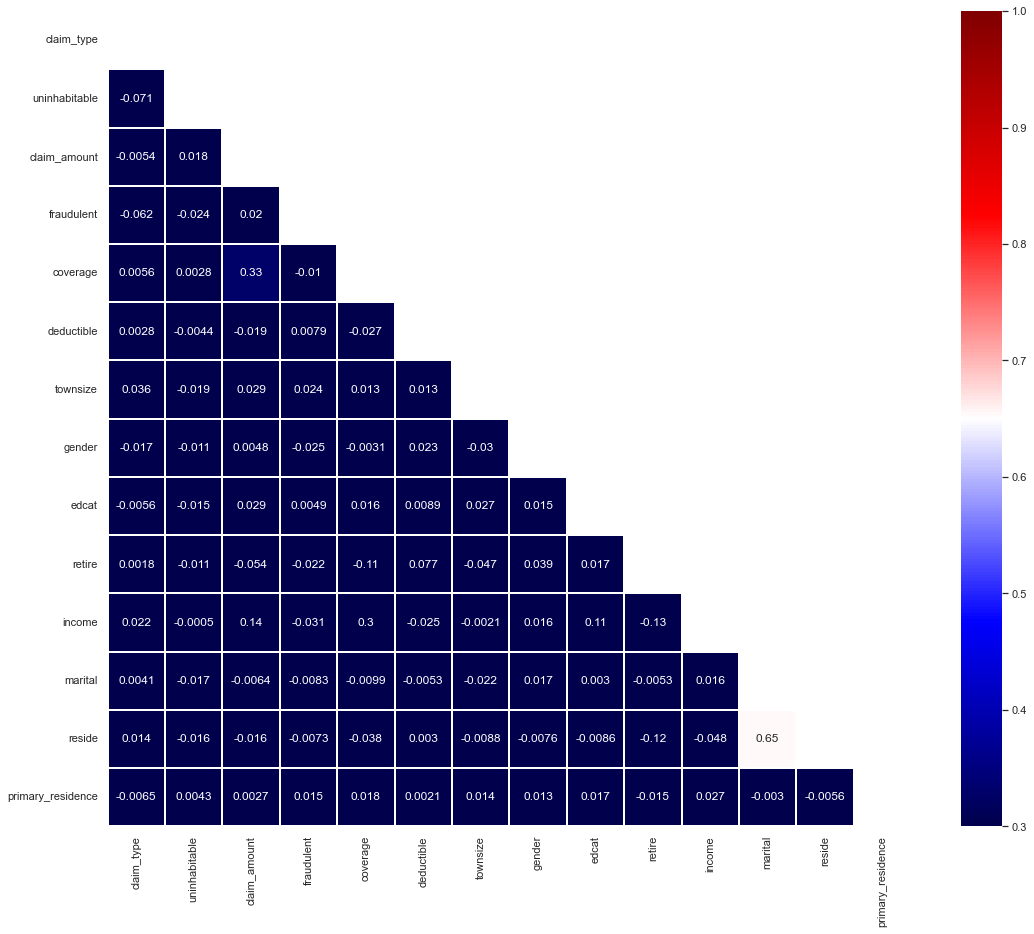

In [17]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap="seismic", vmin=0.3, vmax=1)

Fraudulent Count :
 0    3952
1     463
Name: fraudulent, dtype: int64


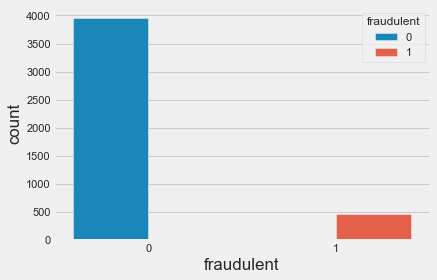

In [18]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraudulent', data=df, hue='fraudulent')
print("Fraudulent Count :\n",df1['fraudulent'].value_counts())

Here we can see that almost 10% fraud reported.

<AxesSubplot:xlabel='primary_residence'>

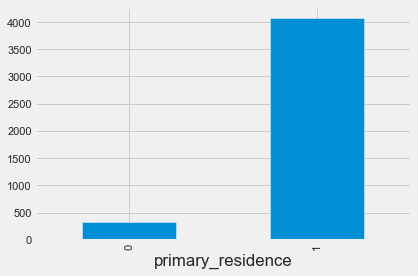

In [19]:
df1.groupby(by = 'primary_residence')['fraudulent'].count().plot(kind='bar')

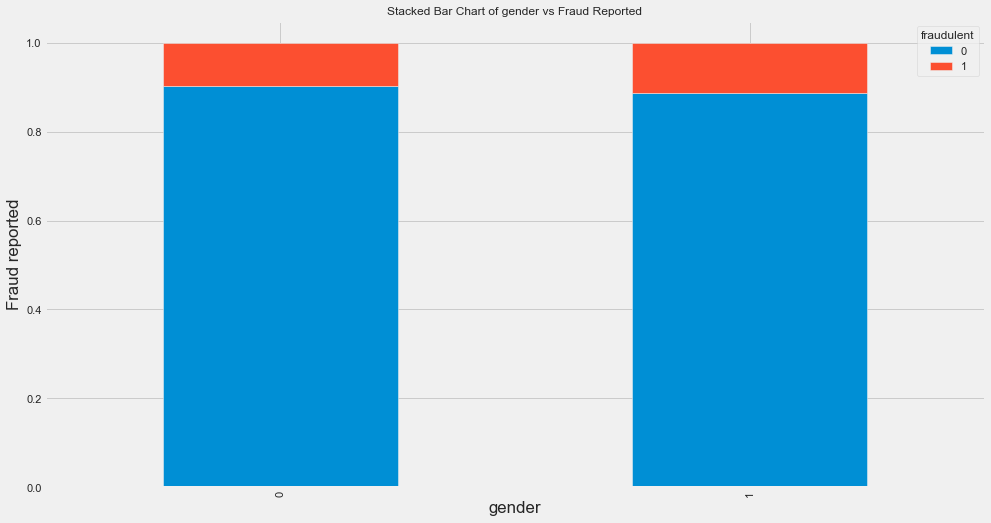

In [20]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.gender, df.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of gender vs Fraud Reported', fontsize=12)
plt.xlabel('gender')
plt.ylabel('Fraud reported')
plt.show()

Text(0, 0.5, 'Fraud reported')

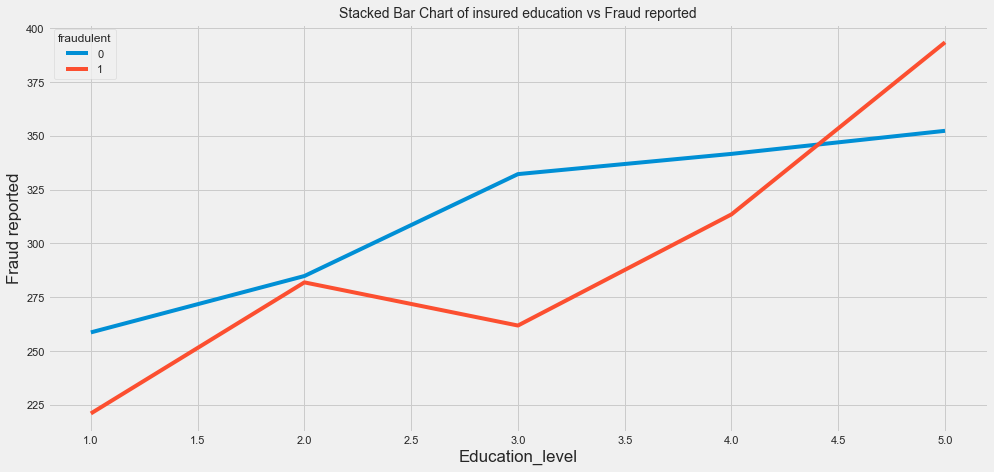

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = df1.groupby(['edcat', 'fraudulent']).mean()['coverage']
df_avg_prem.unstack().plot(ax=ax)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=14)
plt.xlabel('Education_level')
plt.ylabel('Fraud reported')

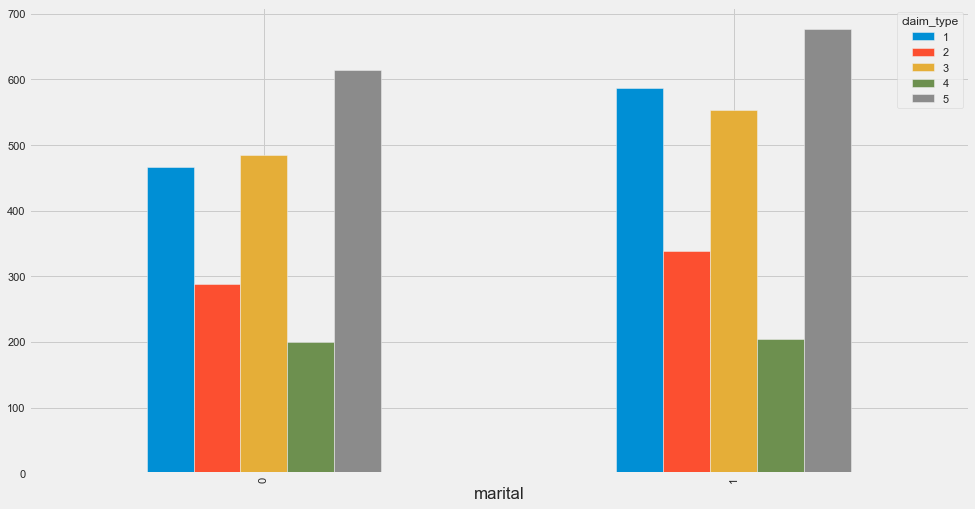

In [22]:
pd.crosstab(df1.marital,df1.claim_type,).plot(kind = "bar")
plt.show()

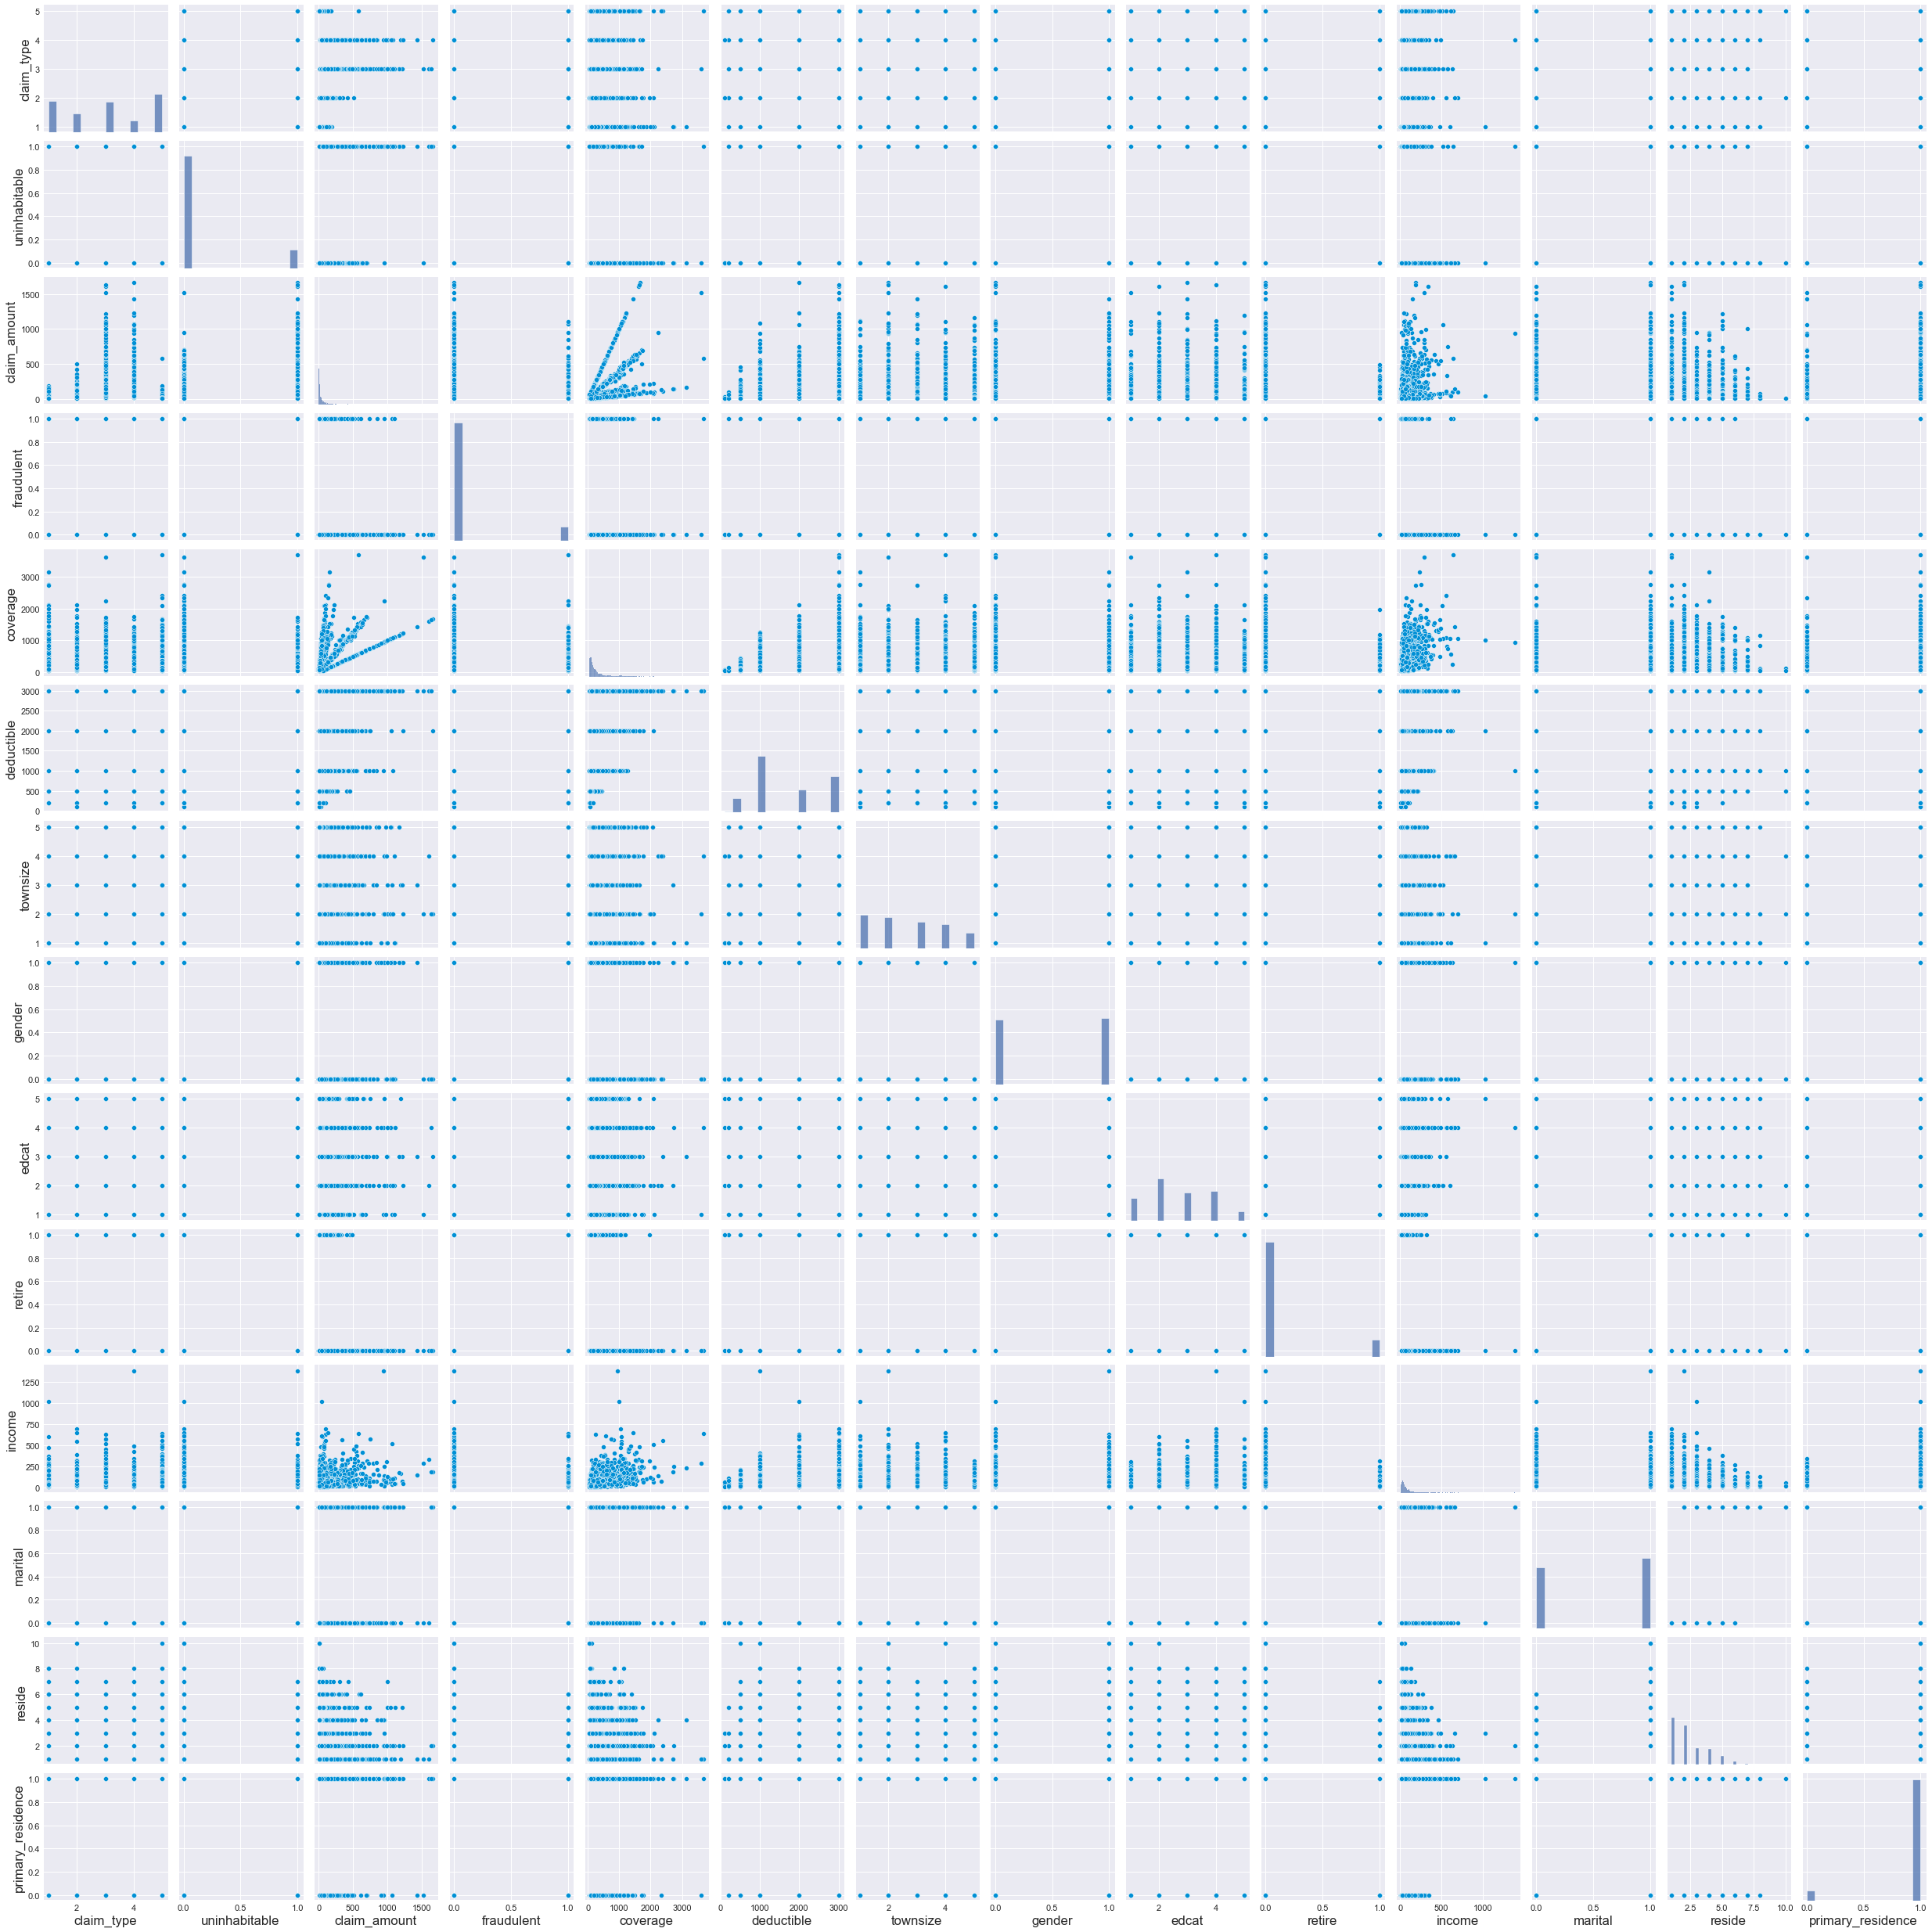

In [23]:
sns.set_style('darkgrid')
sns.pairplot(df1)
plt.show()

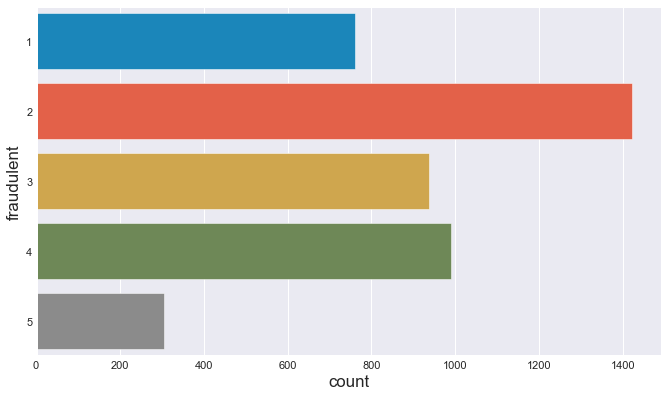

In [24]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'edcat', data=df) 
ax.set_ylabel('fraudulent')
plt.show()

#1 - Did not complete high school
#2 - High school degree
#3 - Some college
#4 - College degree
#5 - Post-undergraduate degree

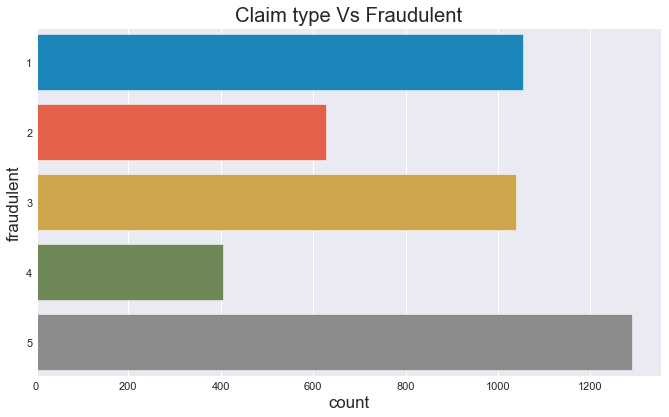

In [25]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'claim_type', data=df)         
ax.set_ylabel('fraudulent')
plt.title("Claim type Vs Fraudulent")
plt.show()

#1 - Wind/Hail
#2 - Water damage
#3 - Fire-Smoke
#4 - Contamination
#5 - Theft/Vandalism

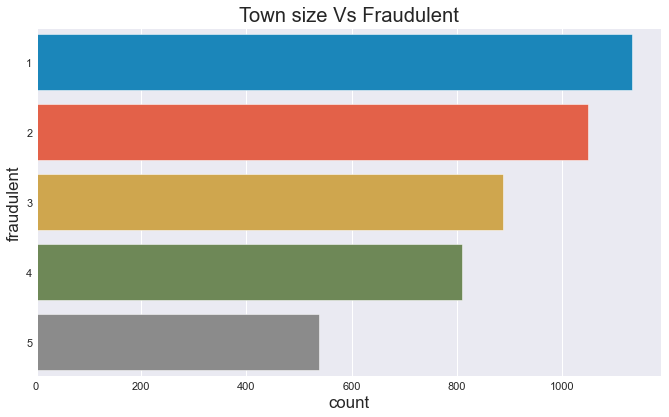

In [26]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'townsize', data=df)         
ax.set_ylabel('fraudulent')
plt.title("Town size Vs Fraudulent")
plt.show()

#1 - > 250,000
#2 - 50,000-249,999
#3 - 10,000-49,999
#4 - 2,500-9,999 
#5 - < 2,500

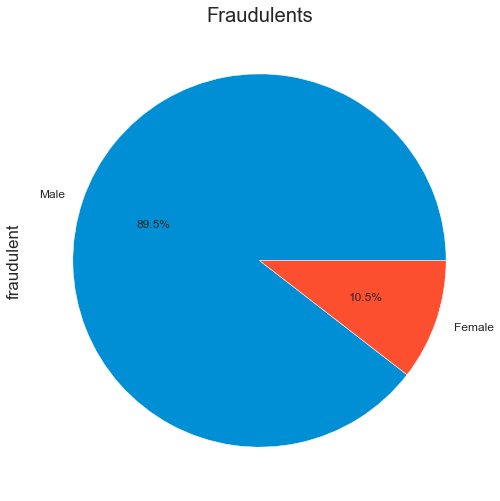

In [27]:
ax = (df1['fraudulent'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('Fraudulents')
plt.show()

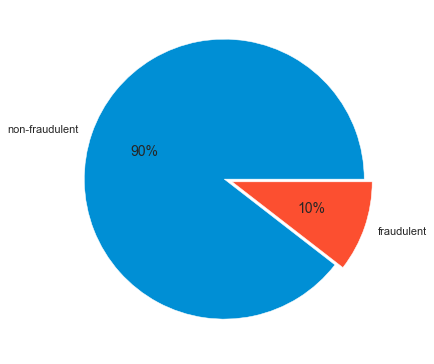

In [28]:
plt.figure(figsize=(12,6))
plt.pie(counts,labels = ['non-fraudulent','fraudulent'], autopct='%.0f%%',explode = (0.06,0))
plt.show()

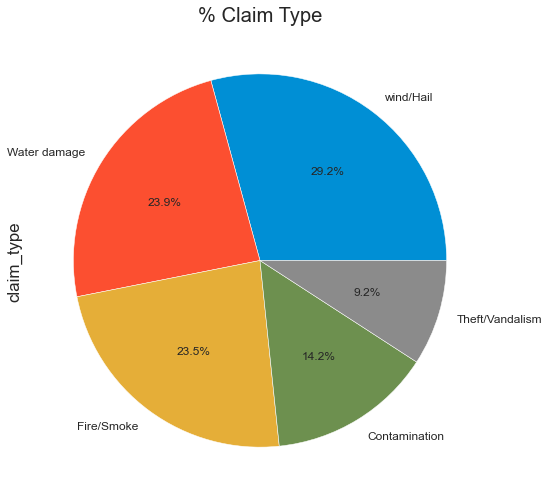

In [29]:
ax = (df['claim_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ["wind/Hail","Water damage","Fire/Smoke","Contamination","Theft/Vandalism"],
         fontsize=12)                                                                           
ax.set_title('% Claim Type')
plt.show()

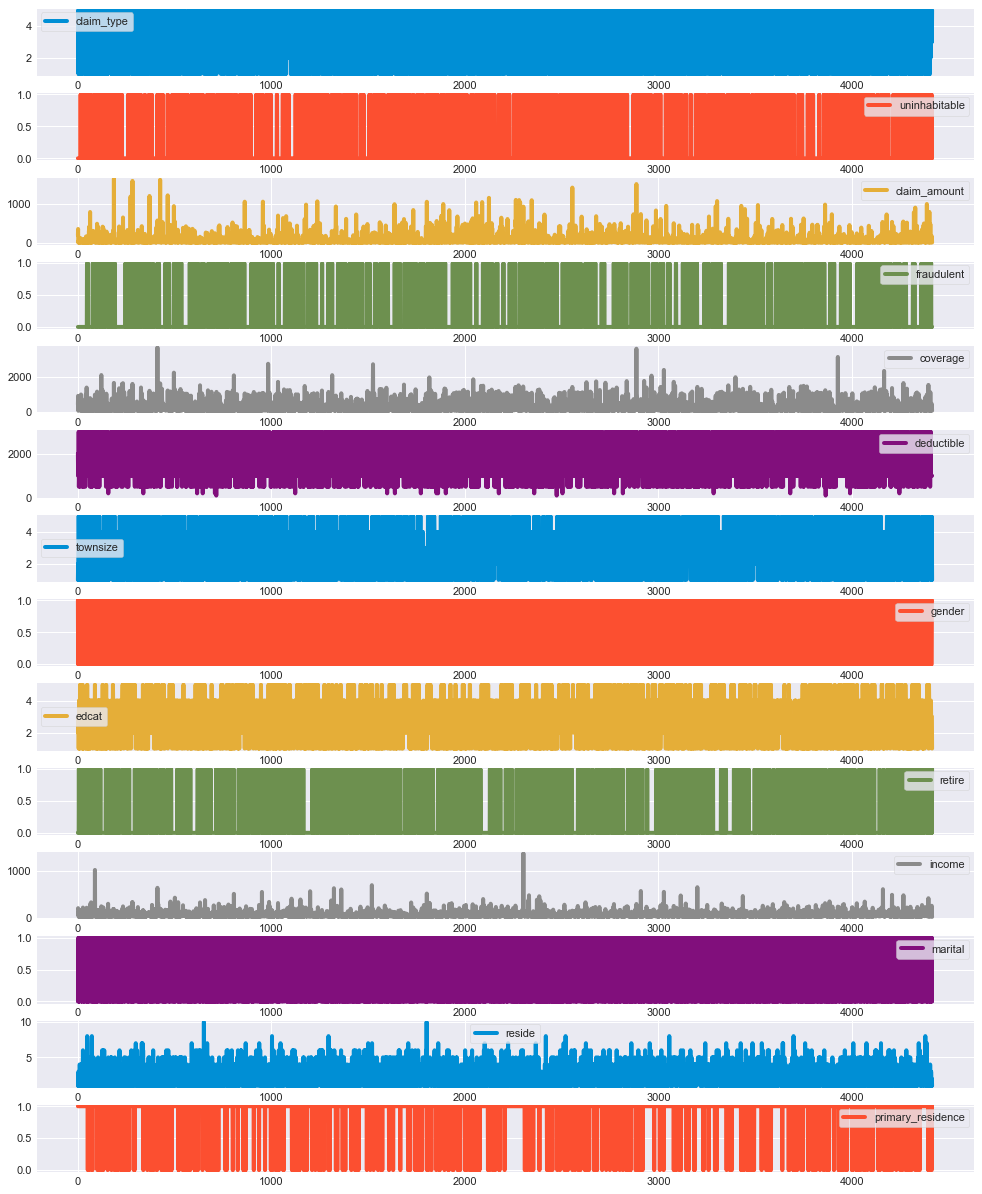

In [30]:
# Univariate Density Plots
from matplotlib import pyplot

df1.plot(subplots=True, figsize=(15, 20),sharex=False)
pyplot.show()

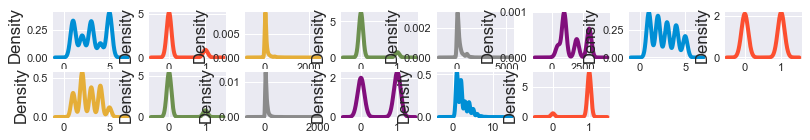

In [31]:
# density
df1.plot(kind='density',
             figsize=(12, 8),
             subplots=True,
             layout=(8, 8),
             sharex=False,
             legend=False)
pyplot.show()

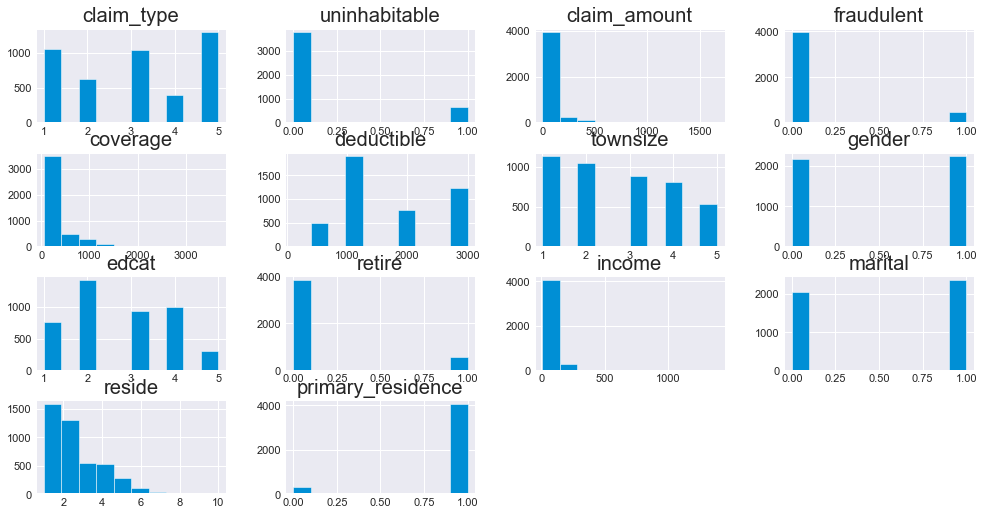

In [32]:
df1.hist(figsize=(15, 8))
pyplot.show()

<AxesSubplot:>

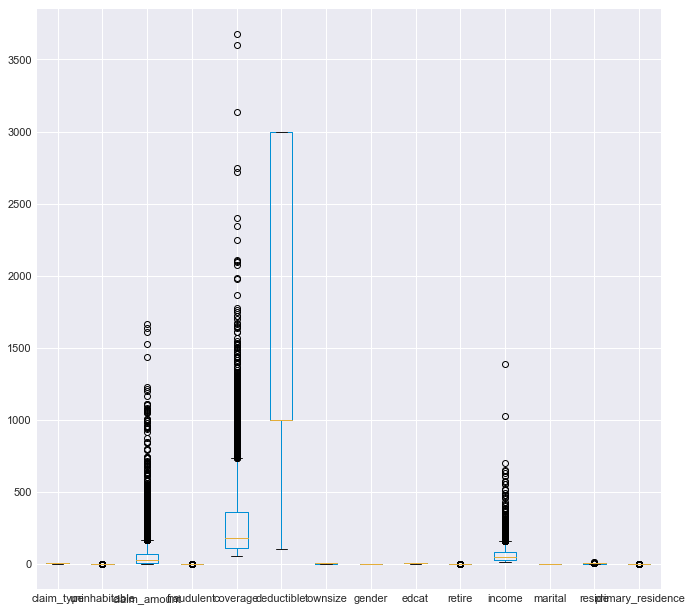

In [33]:
df1.boxplot(figsize=(10, 10))

<AxesSubplot:ylabel='income'>

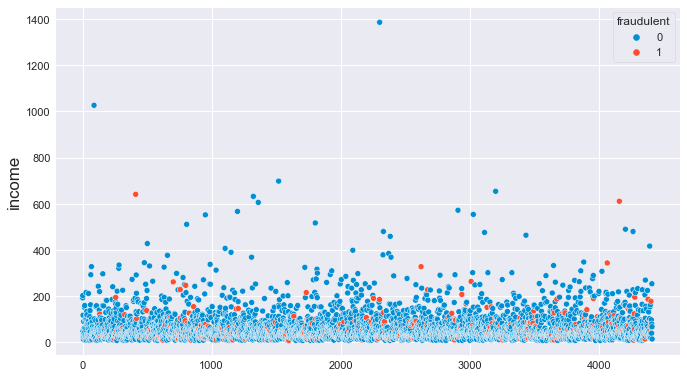

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot( x=range(1,4416),y=df1.income,hue=df1.fraudulent)

# Visualization in Sweetviz

In [35]:
!pip install pandas_profiling

In [36]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(df1)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
import sweetviz as sv
sweet_report = sv.analyze(df1)
sweet_report.show_html('weather_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Rescaling

In [38]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
X = df1.drop(['fraudulent'],axis=1)
y = df1[['fraudulent']]

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(X_scaled)

[[-0.037 -0.413  0.826 ... -1.072 -0.929  0.288]
 [-0.037 -0.413  1.959 ... -1.072 -0.929  0.288]
 [ 1.266 -0.413 -0.481 ... -1.072 -0.929  0.288]
 ...
 [ 0.615 -0.413  0.677 ...  0.933 -0.242 -3.473]
 [-0.037 -0.413  0.449 ... -1.072 -0.242  0.288]
 [ 1.266 -0.413 -0.476 ... -1.072 -0.929  0.288]]


# Standardizing the Data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(X_scaled)

[[-0.037 -0.413  0.826 ... -1.072 -0.929  0.288]
 [-0.037 -0.413  1.959 ... -1.072 -0.929  0.288]
 [ 1.266 -0.413 -0.481 ... -1.072 -0.929  0.288]
 ...
 [ 0.615 -0.413  0.677 ...  0.933 -0.242 -3.473]
 [-0.037 -0.413  0.449 ... -1.072 -0.242  0.288]
 [ 1.266 -0.413 -0.476 ... -1.072 -0.929  0.288]]


In [40]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,y_TRAIN,y_TEST = train_test_split(X_scaled,y,train_size=.8,random_state=40)

# Model Building

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion='gini',n_estimators=80,class_weight='balanced')
rf_classifier.fit(X_TRAIN,y_TRAIN)

RandomForestClassifier(class_weight='balanced', n_estimators=80)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,roc_auc_score,classification_report,roc_curve,f1_score

In [45]:
y_pred_train = rf_classifier.predict(X_TRAIN)
y_pred_test = rf_classifier.predict(X_TEST)

In [46]:
print('accuracy score:',accuracy_score(y_TRAIN,y_pred_train))
print('classification_report:\n',classification_report(y_TRAIN,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_TRAIN,y_pred_train))

accuracy score: 0.9994337485843715
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3155
           1       1.00      0.99      1.00       377

    accuracy                           1.00      3532
   macro avg       1.00      1.00      1.00      3532
weighted avg       1.00      1.00      1.00      3532

confusion matrix:
 [[3155    0]
 [   2  375]]


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini')
dt_classifier.fit(X_TRAIN,y_TRAIN)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [48]:
y_pred_train = dt_classifier.predict(X_TRAIN)
y_pred_test = dt_classifier.predict(X_TEST)

In [49]:
print('accuracy score:',accuracy_score(y_TRAIN,y_pred_train))
print('classification_report:\n',classification_report(y_TRAIN,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_TRAIN,y_pred_train))

accuracy score: 0.5342582106455266
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.53      0.67      3155
           1       0.13      0.61      0.22       377

    accuracy                           0.53      3532
   macro avg       0.53      0.57      0.44      3532
weighted avg       0.83      0.53      0.62      3532

confusion matrix:
 [[1658 1497]
 [ 148  229]]


# SVM

In [50]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',C=1,gamma='auto',)
svc_model.fit(X_TRAIN,y_TRAIN)

SVC(C=1, gamma='auto')

In [51]:
y_pred_train = svc_model.predict(X_TRAIN)
y_pred_test = svc_model.predict(X_TEST)

In [52]:
print('accuracy score:',accuracy_score(y_TRAIN,y_pred_train))
print('classification_report:\n',classification_report(y_TRAIN,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_TRAIN,y_pred_train))

accuracy score: 0.8935447338618346
classification_report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3155
           1       1.00      0.00      0.01       377

    accuracy                           0.89      3532
   macro avg       0.95      0.50      0.47      3532
weighted avg       0.90      0.89      0.84      3532

confusion matrix:
 [[3155    0]
 [ 376    1]]


# Balancing the Data

In [53]:
!pip install imblearn

In [54]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [55]:
smk = SMOTETomek(random_state=12)
X_res,y_res = smk.fit_resample(X_scaled,y)

In [56]:
X_res.shape,y_res.shape

#original datapoints = 4415
#After Balancing the data we have got equal no of fraudulent and non fraudulent data points = 7846 

((7846, 13), (7846, 1))

In [57]:
y.value_counts()

fraudulent
0             3952
1              463
dtype: int64

In [58]:
y_res.value_counts()

fraudulent
0             3923
1             3923
dtype: int64

In [59]:
pd.DataFrame(X_res) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.037,-0.413,0.826,0.401,0.355,-1.239,0.985,-0.584,-0.387,1.876,-1.072,-0.929,0.288
1,-0.037,-0.413,1.959,1.901,-0.720,-0.500,-1.015,-0.584,-0.387,2.025,-1.072,-0.929,0.288
2,1.266,-0.413,-0.481,-0.693,-0.720,-1.239,0.985,-0.584,-0.387,-0.256,-1.072,-0.929,0.288
3,-1.340,-0.413,-0.274,0.926,-0.720,-1.239,-1.015,0.255,-0.387,0.766,0.933,0.446,0.288
4,1.266,-0.413,-0.478,-0.570,1.429,1.718,0.985,-1.424,-0.387,-0.715,-1.072,-0.929,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7841,1.266,-0.413,-0.480,-0.628,-1.156,-0.361,-1.015,-0.427,-0.387,-0.185,0.933,1.004,0.288
7842,1.266,-0.413,-0.471,-0.637,-1.073,0.493,0.985,-0.584,-0.387,-0.543,-1.072,-0.929,0.288
7843,1.266,-0.413,-0.483,-0.696,-0.720,-0.500,0.985,0.317,-0.387,-0.423,0.933,1.133,0.288
7844,-0.495,-0.413,-0.332,-0.519,0.036,0.979,-1.015,-0.335,-0.387,-0.186,0.933,1.337,0.288


# Feature Extraction with RFE

In [60]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X_res, y_res)

fit.n_features_
fit.support_
fit.ranking_

array([ 1,  1,  7,  6, 10,  4,  5,  2,  1,  1,  9,  3,  8])

# Feature Importance with Extra Trees Classifier

In [61]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X_res, y_res)

print(model.feature_importances_)

[0.106 0.019 0.095 0.1   0.105 0.129 0.049 0.129 0.019 0.102 0.036 0.089
 0.02 ]


# Model Selection

# Splitting the data in Train And Test

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,train_size=.8,random_state=40)

In [63]:
X_train.shape,y_train.shape

((6276, 13), (6276, 1))

In [64]:
X_test.shape,y_test.shape

((1570, 13), (1570, 1))

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lin_model = LogisticRegression(class_weight='balanced',C=2.0,l1_ratio=0)
lin_model.fit(X_train,y_train)

LogisticRegression(C=2.0, class_weight='balanced', l1_ratio=0)

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,roc_auc_score,classification_report,roc_curve,f1_score

#### Train Data

In [67]:
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

In [68]:
print('accuracy score:',accuracy_score(y_train,y_pred_train)*100)
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 57.60038240917782
classification_report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.57      3156
           1       0.57      0.60      0.58      3120

    accuracy                           0.58      6276
   macro avg       0.58      0.58      0.58      6276
weighted avg       0.58      0.58      0.58      6276

confusion matrix:
 [[1748 1408]
 [1253 1867]]


In [69]:
list1 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train),roc_auc_score(y_train,y_pred_train)]
list1

[0.5700763358778626,
 0.5983974358974359,
 0.5838936669272868,
 0.5760038240917782,
 0.5761315443112021]

In [70]:
reference = pd.DataFrame(
    index = ['precision_score','recall_score','f1_score','accuracy_score','roc_auc_score'],columns=['logistic'])
reference['logistic'] = list1
reference

,logistic
precision_score,0.570
recall_score,0.598
f1_score,0.584
accuracy_score,0.576
roc_auc_score,0.576


Test Data

In [71]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.5719745222929936
classification_report:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55       767
           1       0.58      0.61      0.59       803

    accuracy                           0.57      1570
   macro avg       0.57      0.57      0.57      1570
weighted avg       0.57      0.57      0.57      1570

confusion matrix:
 [[411 356]
 [316 487]]


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini')
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [73]:
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

#Train data

In [74]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.6163161249203314
classification_report:
               precision    recall  f1-score   support

           0       0.73      0.38      0.50      3156
           1       0.58      0.85      0.69      3120

    accuracy                           0.62      6276
   macro avg       0.65      0.62      0.59      6276
weighted avg       0.65      0.62      0.59      6276

confusion matrix:
 [[1205 1951]
 [ 457 2663]]


In [75]:
list2 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train),roc_auc_score(y_train,y_pred_train)]
list2

[0.5771564802774165,
 0.853525641025641,
 0.6886475303853117,
 0.6163161249203314,
 0.6176690309057229]

In [76]:
reference['decision_tree'] = list2
reference

,logistic,decision_tree
precision_score,0.570,0.577
recall_score,0.598,0.854
f1_score,0.584,0.689
accuracy_score,0.576,0.616
roc_auc_score,0.576,0.618


#Test data

In [77]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.6197452229299363
classification_report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.49       767
           1       0.59      0.85      0.70       803

    accuracy                           0.62      1570
   macro avg       0.65      0.61      0.59      1570
weighted avg       0.65      0.62      0.60      1570

confusion matrix:
 [[292 475]
 [122 681]]


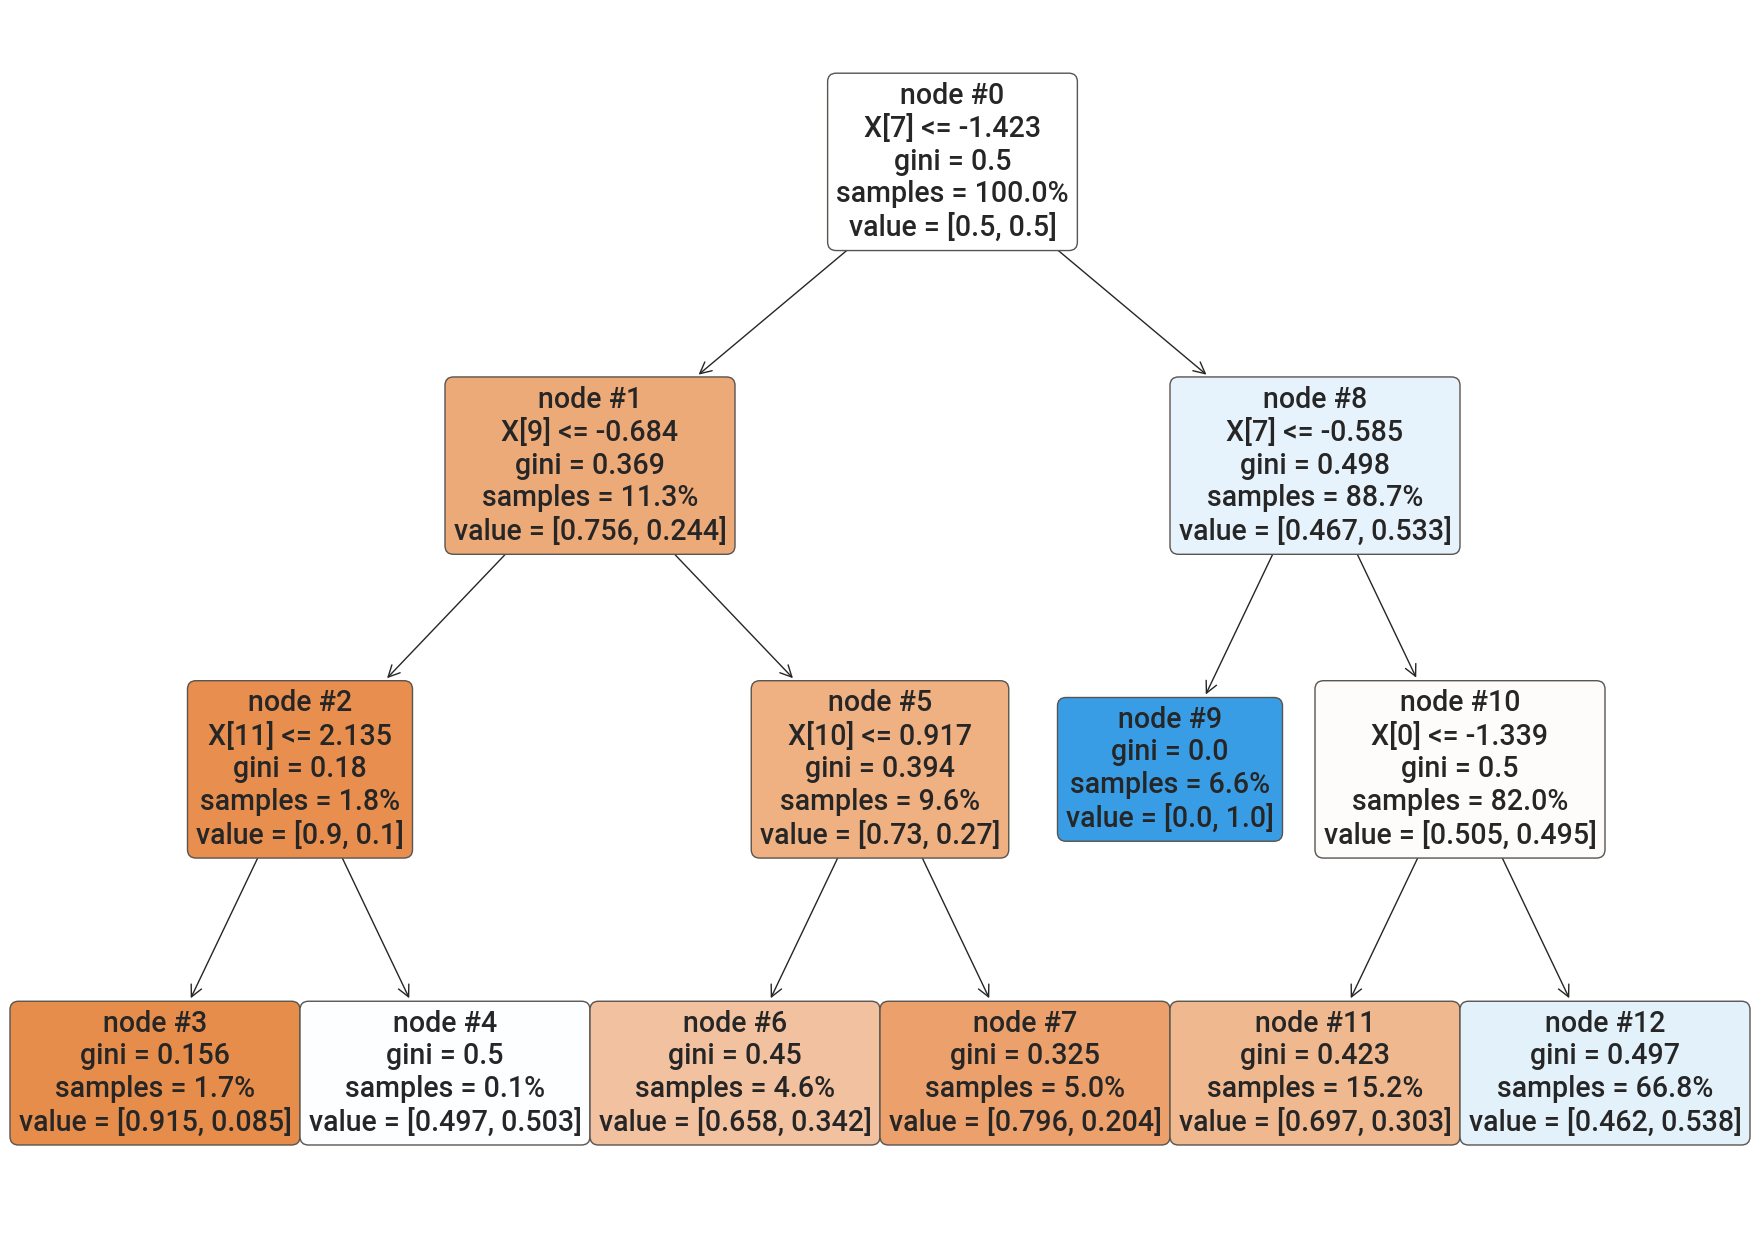

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt_classifier,filled=True,impurity=True,node_ids=True,proportion=True,rounded=True,)
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dt_classifier,param_grid={'criterion':['gini','entropy'],
                                            'max_depth':[2,3,4,5,6,7,8,9,10]},cv =3)
gs.fit(X_scaled,y)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [80]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [81]:
gs.best_score_

0.6283310057241943

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion='gini',n_estimators=80,class_weight='balanced')
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=80)

In [83]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf_classifier,param_grid={'n_estimators':[100,90,80],
                                            'criterion':['gini','entropy']},cv=5)
gs.fit(X_scaled,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=80),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 90, 80]})

In [84]:
gs.best_params_

{'criterion': 'entropy', 'n_estimators': 80}

In [85]:
gs.best_score_

0.8953567383918459

In [86]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

#Train Data

In [87]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 1.0
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3156
           1       1.00      1.00      1.00      3120

    accuracy                           1.00      6276
   macro avg       1.00      1.00      1.00      6276
weighted avg       1.00      1.00      1.00      6276

confusion matrix:
 [[3156    0]
 [   0 3120]]


In [88]:
list3 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train),
         roc_auc_score(y_train,y_pred_train)]
list3

[1.0, 1.0, 1.0, 1.0, 1.0]

In [89]:
reference['random_forest'] = list3
reference

,logistic,decision_tree,random_forest
precision_score,0.570,0.577,1.0
recall_score,0.598,0.854,1.0
f1_score,0.584,0.689,1.0
accuracy_score,0.576,0.616,1.0
roc_auc_score,0.576,0.618,1.0


Test data

In [90]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.9407643312101911
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       767
           1       0.98      0.91      0.94       803

    accuracy                           0.94      1570
   macro avg       0.94      0.94      0.94      1570
weighted avg       0.94      0.94      0.94      1570

confusion matrix:
 [[750  17]
 [ 76 727]]


# SVM

In [91]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',C=1,gamma='auto',)
svc_model.fit(X_train,y_train)

SVC(C=1, gamma='auto')

In [92]:
y_pred_train = svc_model.predict(X_train)
y_pred_test = svc_model.predict(X_test)

##Train Data

In [93]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.7539834289356278
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73      3156
           1       0.71      0.85      0.77      3120

    accuracy                           0.75      6276
   macro avg       0.76      0.75      0.75      6276
weighted avg       0.76      0.75      0.75      6276

confusion matrix:
 [[2078 1078]
 [ 466 2654]]


In [94]:
list4 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train),
         roc_auc_score(y_train,y_pred_train)]
list4

[0.7111468381564845,
 0.8506410256410256,
 0.7746643315820197,
 0.7539834289356278,
 0.7545347080042897]

In [95]:
reference['SVM'] = list4
reference

,logistic,decision_tree,random_forest,SVM
precision_score,0.570,0.577,1.0,0.711
recall_score,0.598,0.854,1.0,0.851
f1_score,0.584,0.689,1.0,0.775
accuracy_score,0.576,0.616,1.0,0.754
roc_auc_score,0.576,0.618,1.0,0.755


#Test Data

In [96]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.7280254777070063
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69       767
           1       0.70      0.83      0.76       803

    accuracy                           0.73      1570
   macro avg       0.74      0.73      0.72      1570
weighted avg       0.74      0.73      0.72      1570

confusion matrix:
 [[477 290]
 [137 666]]


In [97]:
list4 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train),roc_auc_score(y_train,y_pred_train)]
list4

[0.7111468381564845,
 0.8506410256410256,
 0.7746643315820197,
 0.7539834289356278,
 0.7545347080042897]

In [98]:
reference['SVM'] = list4
reference

,logistic,decision_tree,random_forest,SVM
precision_score,0.570,0.577,1.0,0.711
recall_score,0.598,0.854,1.0,0.851
f1_score,0.584,0.689,1.0,0.775
accuracy_score,0.576,0.616,1.0,0.754
roc_auc_score,0.576,0.618,1.0,0.755


# Boosting Technique

In [99]:
!pip install lightgbm

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [102]:
gb_classifier = GradientBoostingClassifier()
adb_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [103]:
gb_classifier.fit(X_train,y_train)
adb_classifier.fit(X_train,y_train)
xgb_classifier.fit(X_train,y_train)
lgbm_classifier.fit(X_train,y_train)

[20:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

# Adaboost Performance

In [104]:
y_pred_adb = adb_classifier.predict(X_test)

In [105]:
print(accuracy_score(y_test,y_pred_adb))
print(classification_report(y_test,y_pred_adb))
print(confusion_matrix(y_test,y_pred_adb))

0.8713375796178344
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       767
           1       0.96      0.78      0.86       803

    accuracy                           0.87      1570
   macro avg       0.88      0.87      0.87      1570
weighted avg       0.89      0.87      0.87      1570

[[740  27]
 [175 628]]


In [106]:
list5 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train),
         roc_auc_score(y_train,y_pred_train)]
list5

[0.7111468381564845,
 0.8506410256410256,
 0.7746643315820197,
 0.7539834289356278,
 0.7545347080042897]

In [107]:
reference['Adaboost'] = list5
reference

,logistic,decision_tree,random_forest,SVM,Adaboost
precision_score,0.570,0.577,1.0,0.711,0.711
recall_score,0.598,0.854,1.0,0.851,0.851
f1_score,0.584,0.689,1.0,0.775,0.775
accuracy_score,0.576,0.616,1.0,0.754,0.754
roc_auc_score,0.576,0.618,1.0,0.755,0.755


#### Gradient Performance

In [108]:
y_pred_gb = gb_classifier.predict(X_test)

In [109]:
print(accuracy_score(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))

0.9140127388535032
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       767
           1       1.00      0.84      0.91       803

    accuracy                           0.91      1570
   macro avg       0.92      0.92      0.91      1570
weighted avg       0.93      0.91      0.91      1570

[[764   3]
 [132 671]]


In [110]:
list6 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train),
         roc_auc_score(y_train,y_pred_train)]
list6

[0.7111468381564845,
 0.8506410256410256,
 0.7746643315820197,
 0.7539834289356278,
 0.7545347080042897]

In [111]:
reference['Gradient Boost'] = list6
reference

,logistic,decision_tree,random_forest,SVM,Adaboost,Gradient Boost
precision_score,0.570,0.577,1.0,0.711,0.711,0.711
recall_score,0.598,0.854,1.0,0.851,0.851,0.851
f1_score,0.584,0.689,1.0,0.775,0.775,0.775
accuracy_score,0.576,0.616,1.0,0.754,0.754,0.754
roc_auc_score,0.576,0.618,1.0,0.755,0.755,0.755


#### Extreme Gradient Boost Performance

In [112]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [113]:
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.9356687898089172
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       767
           1       0.98      0.89      0.93       803

    accuracy                           0.94      1570
   macro avg       0.94      0.94      0.94      1570
weighted avg       0.94      0.94      0.94      1570

[[756  11]
 [ 90 713]]


In [114]:
list7 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train),
         roc_auc_score(y_train,y_pred_train)]
list7

[0.7111468381564845,
 0.8506410256410256,
 0.7746643315820197,
 0.7539834289356278,
 0.7545347080042897]

In [115]:
reference['Extreme Gradient Boost'] = list7
reference

,logistic,decision_tree,random_forest,SVM,Adaboost,Gradient Boost,Extreme Gradient Boost
precision_score,0.570,0.577,1.0,0.711,0.711,0.711,0.711
recall_score,0.598,0.854,1.0,0.851,0.851,0.851,0.851
f1_score,0.584,0.689,1.0,0.775,0.775,0.775,0.775
accuracy_score,0.576,0.616,1.0,0.754,0.754,0.754,0.754
roc_auc_score,0.576,0.618,1.0,0.755,0.755,0.755,0.755


#### LGBM Performance

In [116]:
y_pred_lgbm= lgbm_classifier.predict(X_test)

In [117]:
print(accuracy_score(y_test,y_pred_lgbm))
print(classification_report(y_test,y_pred_lgbm))
print(confusion_matrix(y_test,y_pred_lgbm))

0.9337579617834395
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       767
           1       0.99      0.88      0.93       803

    accuracy                           0.93      1570
   macro avg       0.94      0.94      0.93      1570
weighted avg       0.94      0.93      0.93      1570

[[760   7]
 [ 97 706]]


In [118]:
list8 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train),
         roc_auc_score(y_train,y_pred_train)]
list8

[0.7111468381564845,
 0.8506410256410256,
 0.7746643315820197,
 0.7539834289356278,
 0.7545347080042897]

In [119]:
reference['Extreme Gradient Boost'] = list8
reference

,logistic,decision_tree,random_forest,SVM,Adaboost,Gradient Boost,Extreme Gradient Boost
precision_score,0.570,0.577,1.0,0.711,0.711,0.711,0.711
recall_score,0.598,0.854,1.0,0.851,0.851,0.851,0.851
f1_score,0.584,0.689,1.0,0.775,0.775,0.775,0.775
accuracy_score,0.576,0.616,1.0,0.754,0.754,0.754,0.754
roc_auc_score,0.576,0.618,1.0,0.755,0.755,0.755,0.755


# KNN

Grid Search for Algorithm Tuning

In [120]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [121]:
n_neighbors = np.array(range(1,100))
param_grid = dict(n_neighbors=n_neighbors)

In [122]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [123]:
print(grid.best_score_)
print(grid.best_params_)

0.8730088562945669
{'n_neighbors': 2}


# Voting Classifier

LR: 0.574727 (0.021921)
[20:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:25] WARNING: C:/Users/Administrator/wor

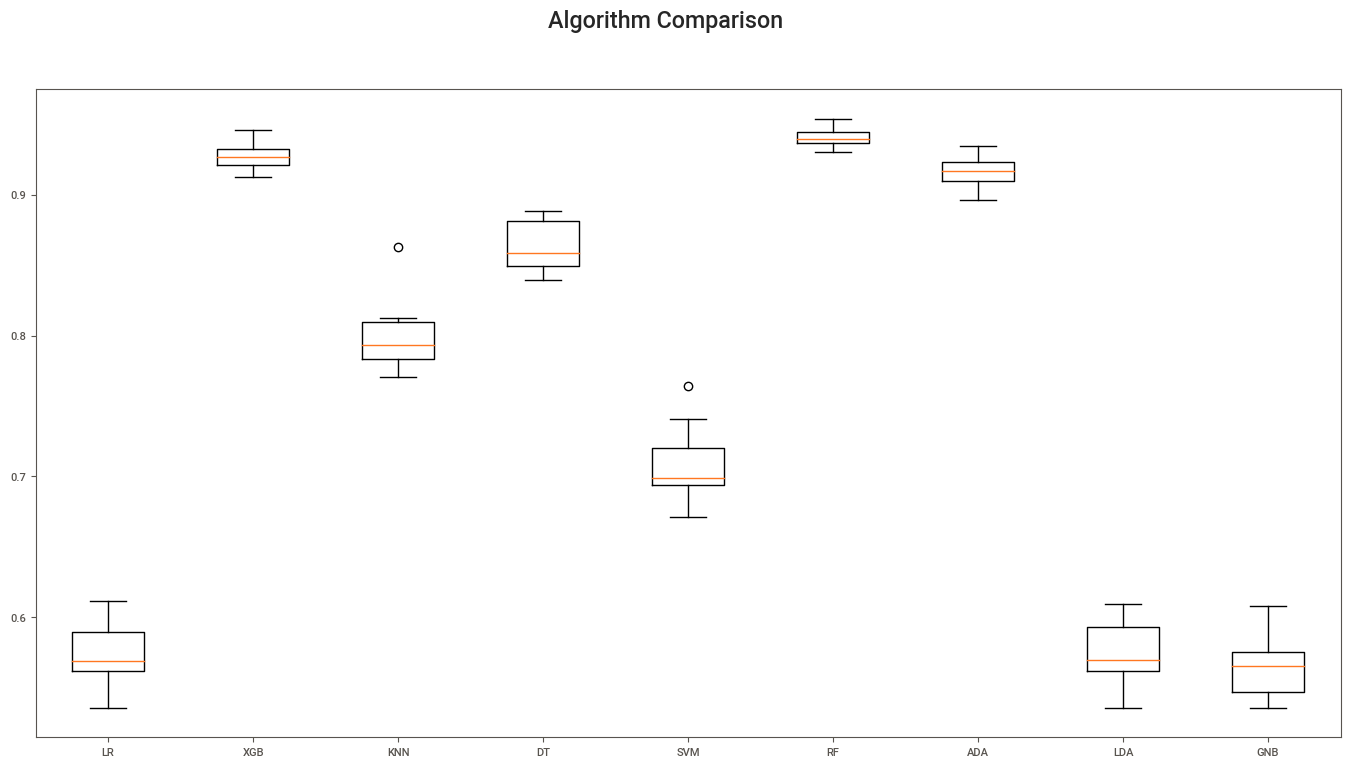

In [124]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [125]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=3000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [126]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#DT
model3 = DecisionTreeClassifier()
#Random Classifier
model4 = RandomForestClassifier(n_estimators=200)
#SVC
model5 = SVC(gamma='auto')
#Adaboostclassifier
model6 = AdaBoostClassifier(n_estimators=200)
#LinearDiscriminantAnalysis
model7 = LinearDiscriminantAnalysis()
#GaussianNB
model8 = GaussianNB()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)
pred_prob8 = model8.predict_proba(X_test)

In [127]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [128]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])
auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score6,auc_score7,auc_score8)

0.9548055599556471 0.9306416323459528 0.8969883573578331 0.9679629336290194 0.9668541105654997 0.9553055203548233 0.9576865198796135


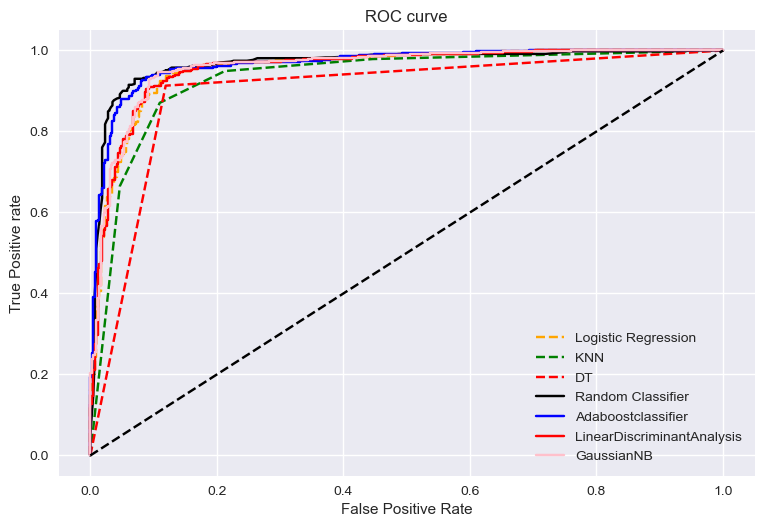

In [129]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='DT')
plt.plot(fpr4, tpr4, linestyle='-',color='black', label='Random Classifier')
plt.plot(fpr6, tpr6, linestyle='-',color='blue', label='Adaboostclassifier')
plt.plot(fpr7, tpr7, linestyle='-',color='red', label='LinearDiscriminantAnalysis')
plt.plot(fpr8, tpr8, linestyle='-',color='pink', label='GaussianNB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

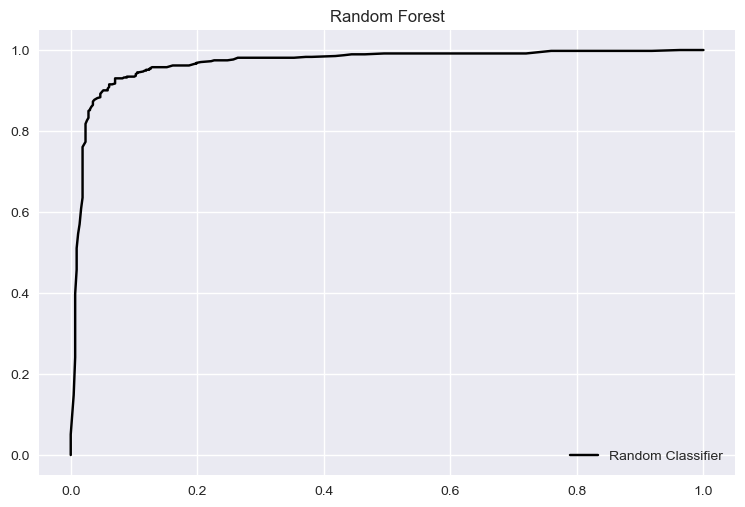

In [130]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr4, tpr4, linestyle='-',color='black', label='Random Classifier')
plt.title("Random Forest")
plt.legend(loc='lower right')

# Hyper Parameter Tunning

In [131]:
#hyperparameters for RandomForestClassifier

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.928889 using {'max_features': 'log2', 'n_estimators': 100}
0.923492 (0.017254) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.928730 (0.019652) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.928730 (0.019342) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.923810 (0.017431) with: {'max_features': 'log2', 'n_estimators': 10}
0.928889 (0.019631) with: {'max_features': 'log2', 'n_estimators': 100}
0.928730 (0.018132) with: {'max_features': 'log2', 'n_estimators': 1000}


# DEPLOYING THE MODEL USING STREAMLIT